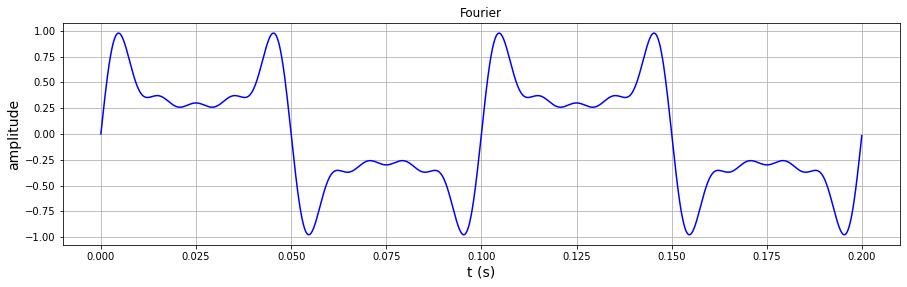

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft

%matplotlib inline
N = 4096
f1, f2, f3, f4, f5 = 10, 30, 50, 70, 90
A1, A2, A3, A4, A5 = 0.5, 0.4, 0.3, 0.2, 0.1
dt = 2/f1/N

t = np.linspace(0, 2/f1, N, endpoint=False)
y = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t) + \
    A4*np.sin(2*np.pi*f4*t) + A5*np.sin(2*np.pi*f5*t)
t


plt.figure(figsize=(15,4), dpi=72)
plt.plot(t, y, linestyle='-', color='blue')
plt.grid()
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.title("Fourier")
plt.show()

Text(0.5, 1.0, 'Frequency')

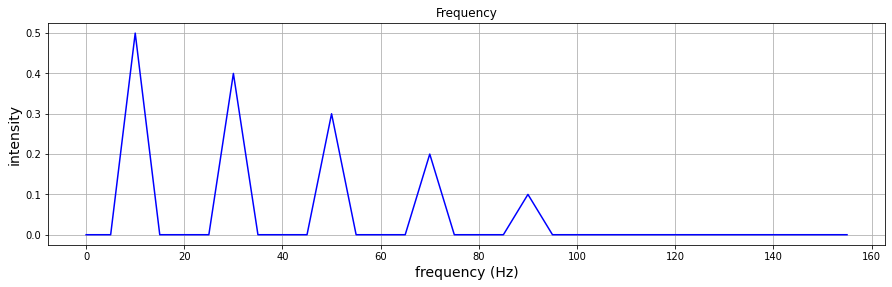

In [7]:
plt.figure(figsize=(15,4), dpi=72)
yf = fft(y)
xf = fftfreq(N, dt)
plt.plot(xf[:N//128], 2/N*np.abs(yf[:N//128]), linestyle='-', color='blue')
plt.grid()
plt.xlabel('frequency (Hz)', fontsize=14)
plt.ylabel('intensity', fontsize=14)
plt.title("Frequency")

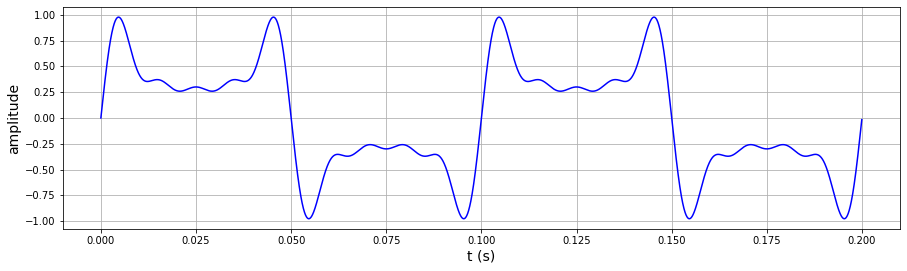

In [8]:
yif = ifft(yf)
plt.figure(figsize=(15,4), dpi=72)
plt.plot(t, yif.real, linestyle='-', color='blue')
plt.grid()
plt.xlabel('t (s)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.show()

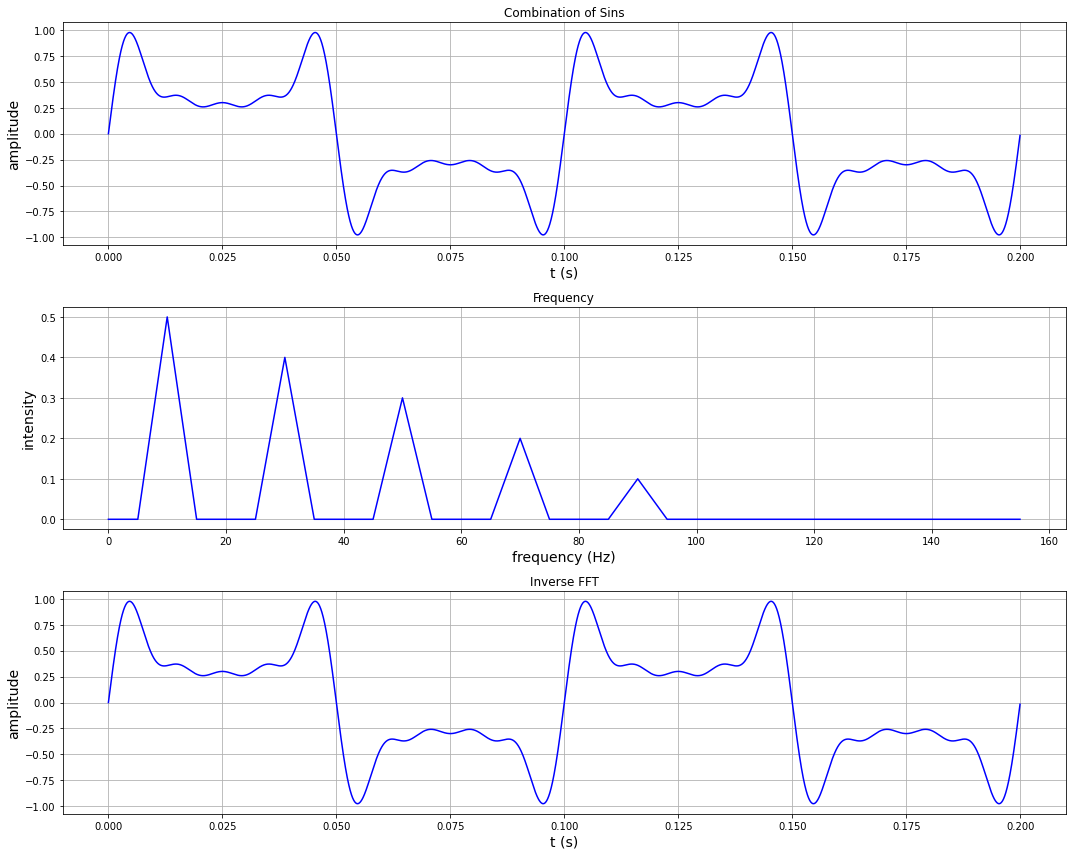

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12), dpi=72, sharex=False)

ax1.plot(t, y, linestyle='-', color='blue')
ax1.grid()
ax1.set_xlabel('t (s)', fontsize=14)
ax1.set_ylabel('amplitude', fontsize=14)
ax1.set_title("Combination of Sins")

ax2.plot(xf[:N//128], 2/N*np.abs(yf[:N//128]), linestyle='-', color='blue')
ax2.grid()
ax2.set_xlabel('frequency (Hz)', fontsize=14)
ax2.set_ylabel('intensity', fontsize=14)
ax2.set_title("Frequency")

ax3.plot(t, yif.real, linestyle='-', color='blue')
ax3.grid()
ax3.set_xlabel('t (s)', fontsize=14)
ax3.set_ylabel('amplitude', fontsize=14)
ax3.set_title("Inverse FFT")

fig.tight_layout()

plt.show()

size of extrapolation: 613


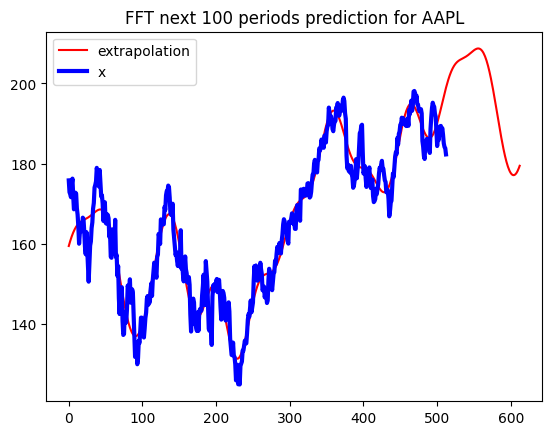

[159.49891401 160.14567635 160.75887843 161.33617436 161.87580866
 162.37661922 162.83803116 163.26004202 163.64319838 163.98856461
 164.29768426 164.57253472 164.81547607 165.02919484 165.21664369
 165.38097799 165.52549026 165.65354346 165.76850438 165.87367778
 165.97224274 166.06719172 166.16127356 166.2569411  166.35630428
 166.46108924 166.57260411 166.69171199 166.81881134 166.95382412
 167.09619178 167.24487911 167.39838582 167.55476562 167.71165258
 167.86629407 168.01559009 168.15613808 168.28428269 168.39616965
 168.48780297 168.5551047  168.59397612 168.60035978 168.57030124
 168.50000974 168.38591699 168.22473308 168.01349896 167.74963459
 167.43098223 167.05584432 166.62301532 166.13180732 165.58206899
 164.97419777 164.30914511 163.58841487 162.81405486 161.98864189
 161.11526046 160.19747554 159.23929986 158.24515627 157.21983572
 156.16845147 155.09639025 154.009261   152.91284197 151.81302686
 150.71577071 149.62703625 148.55274142 147.49870859 146.47061622
 145.47395

In [39]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    symbol = "AAPL"
    x = yf.download(symbol, start='2022-02-02', interval="1d", progress=False)["Close"]
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    print("size of extrapolation:", len(extrapolation))
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    plt.title(f"FFT next 100 periods prediction for {symbol}")
    pl.show()
    print(extrapolation)
if __name__ == "__main__":
    main()

Poly1d of such polyfit:   
0.05325 x + 178
stock price without trend component:  Date
2023-05-01    169.589996
2023-05-02    168.486745
2023-05-03    167.343500
2023-05-04    165.630248
2023-05-05    173.357013
2023-05-08    173.233758
2023-05-09    171.450513
2023-05-10    173.187258
2023-05-11    173.324012
2023-05-12    172.090771
Name: Close, dtype: float64
X_freqdom(detrended x in frequency domain(應該是sin, cos括號內的omega)):  [35953.20234582-2.77111667e-13j   249.72415775-2.07246572e+02j
  -772.71104296+2.31346770e+02j  -104.17675696+3.19653285e+01j
   249.48258   +1.35982838e+02j   -72.10028938+5.95306912e+01j
  -163.50883197+1.18734100e+02j   100.46188417+5.44763123e+01j
  -277.69910535-1.61064090e+02j   101.45811273-1.60948557e+01j]
n:  202
f:  [ 0.          0.0049505   0.00990099  0.01485149  0.01980198  0.02475248
  0.02970297  0.03465347  0.03960396  0.04455446  0.04950495  0.05445545
  0.05940594  0.06435644  0.06930693  0.07425743  0.07920792  0.08415842
  0.08910891  0.094059

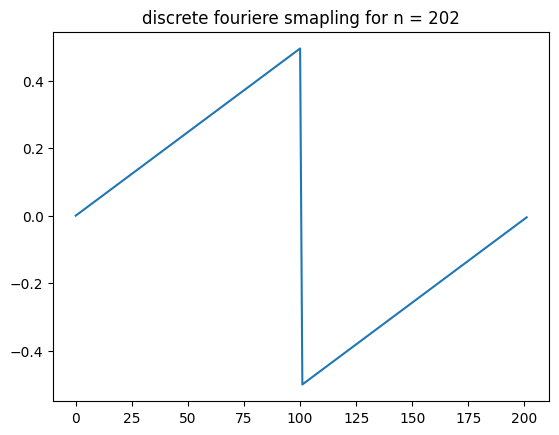

size of extrapolation: 302


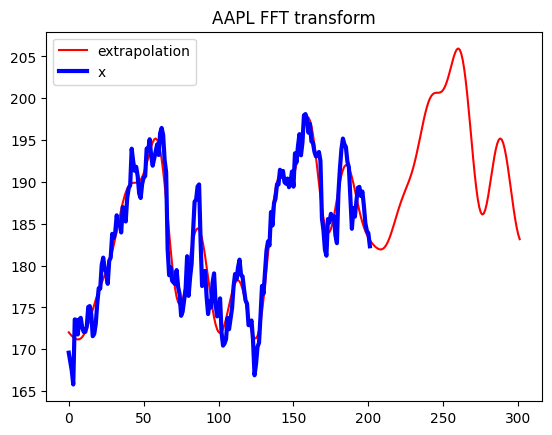

In [81]:
n_predict = 100
import yfinance as yf
import matplotlib.pyplot as plt
ticker = "AAPL"
x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
x = yf.download(ticker, start='2023-05-01', progress=False, interval="1d")['Close']

n = x.size
n_harm = 10                     # number of harmonics in model
t = np.arange(0, n)             # length of close price
# print("t: ", t)
p = np.polyfit(t, x, deg=1)         # find linear trend in x => 線性擬合，其實就是找線性關係
# print("p: ", p)
print("Poly1d of such polyfit: ", np.poly1d(p))
# detrended x => 用最簡單的方法把趨勢去掉，留下震盪項 => 選定計算linear regression 的區間很重要
x_notrend = x - p[0] * t        
print("stock price without trend component: ", x_notrend[:10])
x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
print("X_freqdom(detrended x in frequency domain(應該是sin, cos括號內的omega)): ", x_freqdom[:10])
# plt.plot(x_notrend)

"""
After detrending, the signal is transformed into the frequency domain using the 
Fast Fourier Transform (fft.fft()). 
The frequency domain representation of the signal provides information 
about the different frequency components present in the signal. 
By analyzing the frequency domain representation, 
you can identify dominant frequencies or periodicities in the signal.
"""
print("n: ", n)
f = fft.fftfreq(n)              # frequencies
print("f: ", f)

indexes = list(range(n))
print("indexes: ", indexes)
# # sort indexes by frequency, lower -> higher
indexes.sort(key = lambda i: np.absolute(f[i]))


plt.plot(f)
plt.title(f"discrete fouriere smapling for n = {x.size}")
plt.show()

t = np.arange(0, n + n_predict)
restored_sig = np.zeros(t.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
extrapolation = restored_sig + p[0] * t
print("size of extrapolation:", len(extrapolation))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.title(f"{ticker} FFT transform")
pl.legend()
pl.show()
# # print(len(x))



In [ ]:
n_predict = 100
import yfinance as yf
import matplotlib.pyplot as plt
ticker = "AAPL"
x = yf.download(ticker, start='2023-05-01', progress=False, interval="1d")['Close']

n = x.size
n_harm = 10
t = np.arange(0, n)
p = np.polyfit(t, x, deg=1) 

x_notrend = x - p[0] * t        
x_freqdom = fft.fft(x_notrend)
f = fft.fftfreq(n)

indexes = list(range(n))
indexes.sort(key = lambda i: np.absolute(f[i]))

t = np.arange(0, n + n_predict)
restored_sig = np.zeros(t.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
extrapolation = restored_sig + p[0] * t
print("size of extrapolation:", len(extrapolation))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.title(f"{ticker} FFT transform")
pl.legend()
pl.show()
# # print(len(x))

# =================================================================
# Decision making process

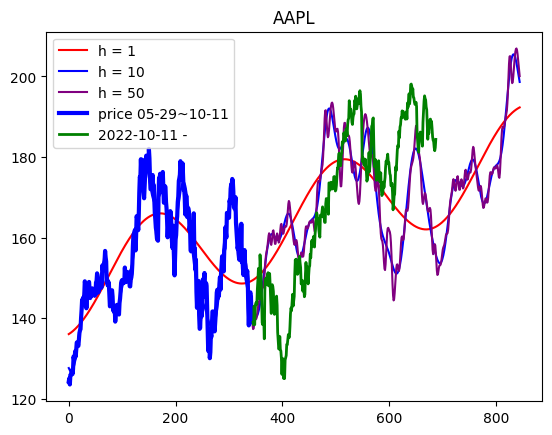

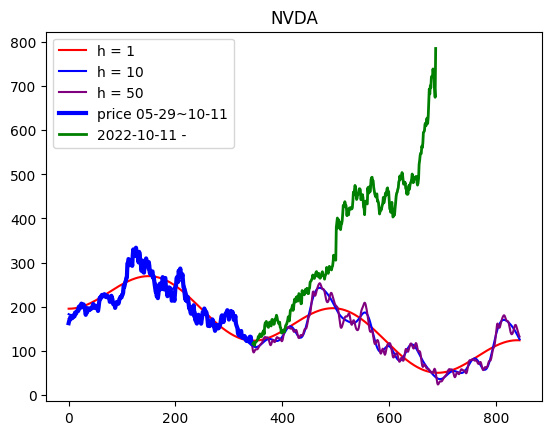

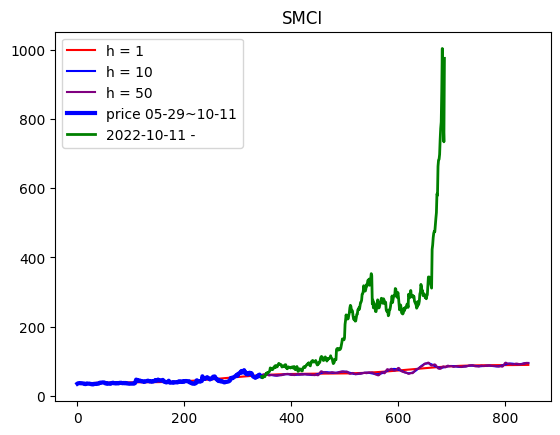

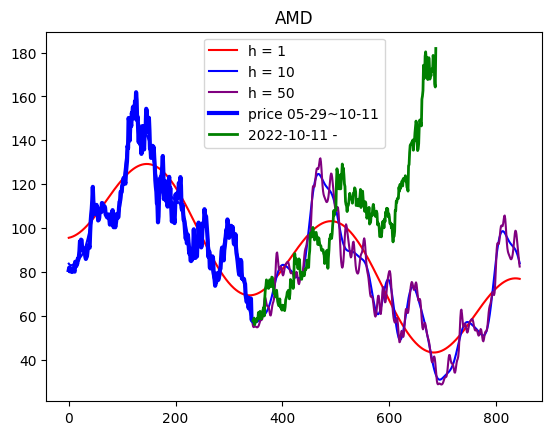

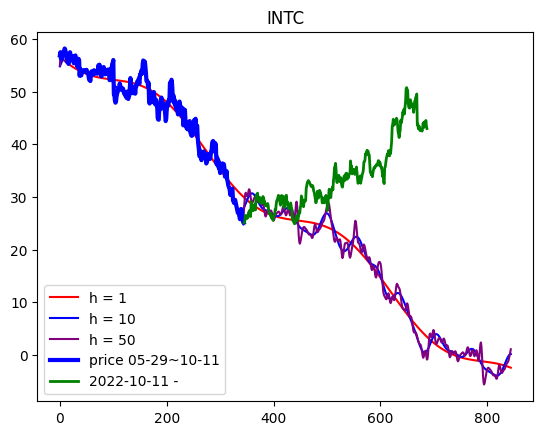

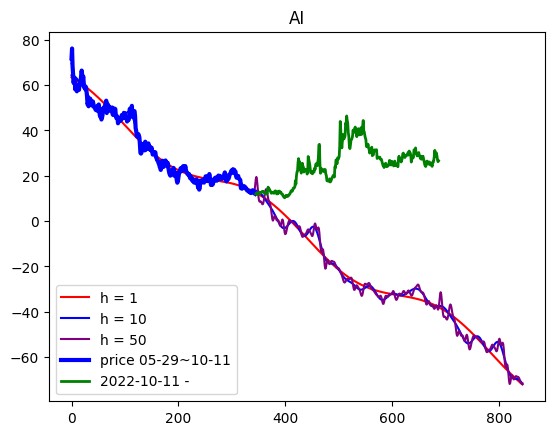

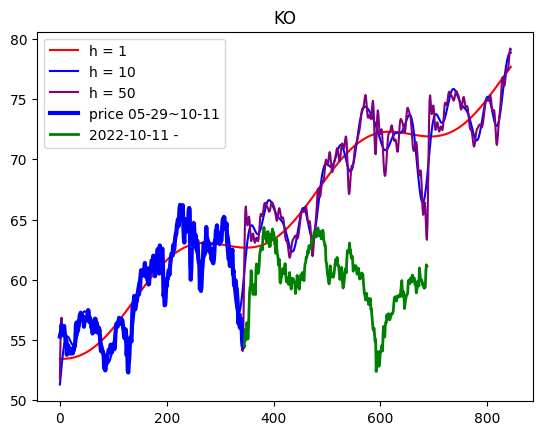

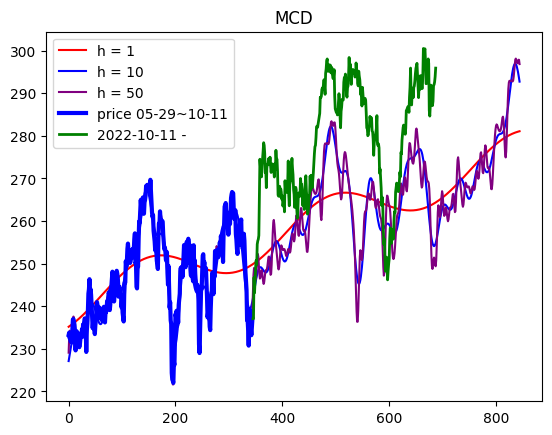

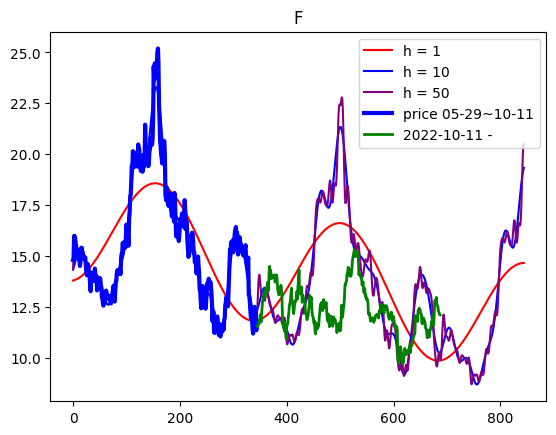

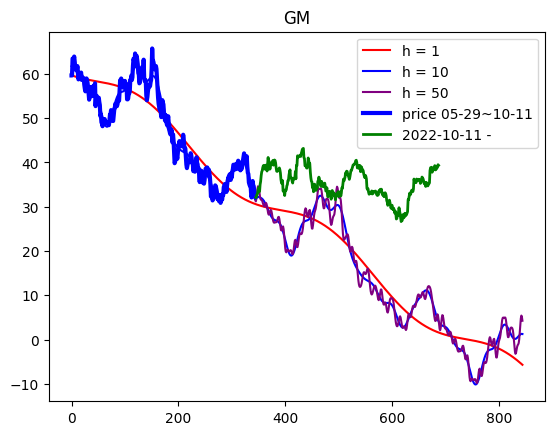

uptrend for max_min validation: ['AAPL', 'NVDA', 'SMCI', 'AMD', 'KO', 'MCD', 'F']
downtrend for max_min validation: ['INTC', 'AI', 'GM']
uptrend for linear regression validation:  ['AAPL', 'SMCI', 'KO', 'MCD']
downtrend for linear regression validation:  ['NVDA', 'AMD', 'INTC', 'AI', 'F', 'GM']
Stock with really uptrend:  ['AAPL', 'NVDA', 'SMCI', 'AMD', 'INTC', 'AI', 'MCD']
Stock with really downtrend:  ['KO', 'F', 'GM']


In [4]:
# version 1
n_predict = 500
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
from numpy import fft
import pylab as pl
ticker = "AAPL"
uptrend_1 = []
downtrend_1 = []
uptrend_2 = []
downtrend_2 = []
uptrend_3 = []
downtrend_3 = []
for ticker in ["AAPL", "NVDA", "SMCI", "AMD", "INTC", "AI", "KO", "MCD", "F", "GM"]:
    # start = '2023-05-01'
    start = datetime.datetime.now() - datetime.timedelta(days=1000)
    # end = '2023-10-01'
    end = start + datetime.timedelta(days=500)
    x = yf.download(ticker, start=start, end=end, progress=False, interval="1d")['Close']
    test = yf.download(ticker, start = end, progress=False)['Close']
    result_trend = np.polyfit(np.arange(0, test.size), test, deg=1)[0]
    n = x.size
    n_harm = 10  
    t = np.arange(0, n)        
    p = np.polyfit(t, x, deg=1)        

    x_notrend = x - p[0] * t        
    x_freqdom = fft.fft(x_notrend) 
    f = fft.fftfreq(n) 

    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    iters = [1, 10, 50]
    for n_harm in iters:
        restored_sig = np.zeros(t.size)
        for i in indexes[:1 + n_harm * 2]:
            ampli = np.absolute(x_freqdom[i]) / n   # amplitude
            phase = np.angle(x_freqdom[i])          # phase
            restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
        extrapolation = restored_sig + p[0] * t
        color = "r" if n_harm == iters[0] else "b"
        if n_harm == 50:
            color = "purple"
        pl.plot(np.arange(0, extrapolation.size), extrapolation, color, label = f'h = {n_harm}')
    pl.plot(np.arange(0, x.size), x, 'b', label = f'price {start.strftime("%m-%d")}~{end.strftime("%m-%d")}', linewidth = 3)
    pl.plot(np.arange(x.size, x.size+test.size), test, 'g', label = f'{end.strftime("%Y-%m-%d")} - ', linewidth = 2)
    # pl.plot(np.arange(0, x.size), x_notrend, "y", label="x_notrend", linewidth = 3)
    pl.title(f"{ticker}")
    pl.legend()
    pl.show()
    last_close = x.iloc[-1]
    diffs = list(extrapolation[x.size:] - last_close)
    max_diff = max(diffs)
    min_diff = min(diffs)

    check_extrapolation_trend = np.polyfit(np.arange(0, len(test)), extrapolation[-(n_predict+test.size):-n_predict], deg=1)[0]

    if max_diff > abs(min_diff):
        uptrend_1.append(ticker)
    elif max_diff < abs(min_diff):
        downtrend_1.append(ticker)
    if result_trend > 0:
        uptrend_2.append(ticker)
    elif result_trend < 0:
        downtrend_2.append(ticker)

    if check_extrapolation_trend > 0:
        uptrend_3.append(ticker)
    elif check_extrapolation_trend < 0:
        downtrend_3.append(ticker)
print("uptrend for max_min validation:", uptrend_1)
print("downtrend for max_min validation:", downtrend_1)
print("uptrend for linear regression validation: ", uptrend_3)
print("downtrend for linear regression validation: ", downtrend_3)
print("Stock with really uptrend: ", uptrend_2)
print("Stock with really downtrend: ", downtrend_2)